In [1]:
import pandas as pd
import nltk
import re
import json
from nltk.corpus import stopwords 
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import spacy
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
from sklearn.cluster import DBSCAN, AgglomerativeClustering, KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, davies_bouldin_score, mean_squared_error
import torch
from transformers import AutoTokenizer, AutoModel

# –ü—Ä–æ–±–ª–µ–º–∞—Ç–∏–∫–∞

–í –†–æ—Å–∞—Ç–æ–º–µ —Ä–∞–∑—Ä–∞–±–æ—Ç–∞–Ω –∏ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –Ω–∞ —Ä—ã–Ω–∫–µ —Å–µ—Ä–≤–∏—Å –¥–ª—è –ø—Ä–æ–≤–µ–¥–µ–Ω–∏—è –∏–Ω—Ç–µ—Ä–∞–∫—Ç–∏–≤–Ω—ã—Ö –æ–Ω–ª–∞–π–Ω-–æ–ø—Ä–æ—Å–æ–≤ ¬´–ú–æ–π –≥–æ–ª–æ—Å¬ª. –û–¥–Ω–∏–º –∏–∑ —Å–ø–æ—Å–æ–±–æ–≤ –ø–æ–ª—É—á–µ–Ω–∏—è –¥–∞–Ω–Ω—ã—Ö —è–≤–ª—è–µ—Ç—Å—è –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å –≤–≤–æ–¥–∞ –ø—Ä–æ–∏–∑–≤–æ–ª—å–Ω—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –æ—Ç–∫—Ä—ã—Ç—ã–µ –≤–æ–ø—Ä–æ—Å—ã. –î–ª—è –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ –Ω–∞–≥–ª—è–¥–Ω–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –æ—Ç–≤–µ—Ç–æ–≤ —Å–µ—Ä–≤–∏—Å –æ–±—ä–µ–¥–∏–Ω—è–µ—Ç –≤ –≥—Ä—É–ø–ø—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ –æ—Ç–≤–µ—Ç—ã, —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏ –±–ª–∏–∑–∫–∏–µ –¥—Ä—É–≥ –∫ –¥—Ä—É–≥—É. –û—Ç –∫–∞—á–µ—Å—Ç–≤–∞ —Ç–∞–∫–æ–π –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –∑–∞–≤–∏—Å–∏—Ç –∫–æ—Ä—Ä–µ–∫—Ç–Ω–æ—Å—Ç—å –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏—è –∏—Ç–æ–≥–æ–≤—ã—Ö —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤, –ø—Ä–∞–≤–∏–ª—å–Ω–æ—Å—Ç—å –∏—Ö –∏–Ω—Ç–µ—Ä–ø—Ä–µ—Ç–∞—Ü–∏–∏ –∏, –∫–∞–∫ —Å–ª–µ–¥—Å—Ç–≤–∏–µ, –æ–±—â–∞—è —É–¥–æ–≤–ª–µ—Ç–≤–æ—Ä–µ–Ω–Ω–æ—Å—Ç—å —Å–µ—Ä–≤–∏—Å–æ–º —Å–æ —Å—Ç–æ—Ä–æ–Ω—ã –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π. –ö–æ–º–∞–Ω–¥–∞ —Ä–∞–∑—Ä–∞–±–æ—Ç—á–∏–∫–æ–≤ –∏—â–µ—Ç —Å–ø–æ—Å–æ–±—ã –ø–æ—Å—Ç–æ—è–Ω–Ω–æ–≥–æ –ø–æ–≤—ã—à–µ–Ω–∏—è –∫–∞—á–µ—Å—Ç–≤–∞ –≥—Ä—É–ø–ø–∏—Ä–æ–≤–∫–∏ –æ—Ç–≤–µ—Ç–æ–≤. –û–±—ä–µ–¥–∏–Ω–µ–Ω–∏–µ –æ—Ç–≤–µ—Ç–æ–≤ –¥–æ–ª–∂–Ω–æ –ø—Ä–æ–≤–æ–¥–∏—Ç—å—Å—è —Å —É—á—ë—Ç–æ–º –≤–æ–∑–º–æ–∂–Ω—ã—Ö –æ—à–∏–±–æ–∫, –æ–ø–µ—á–∞—Ç–æ–∫, –ø—Ä–∏–º–µ–Ω—è–µ–º—ã—Ö –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è–º–∏ —Å–æ–∫—Ä–∞—â–µ–Ω–∏–π.
–°–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∞—è –±–ª–∏–∑–æ—Å—Ç—å –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç—Å—è —Å—Ö–æ–∂–µ—Å—Ç—å—é –º–µ–∂–¥—É —Å–æ–±–æ–π –æ—Ç–≤–µ—Ç–æ–≤ –ø–æ —Å–º—ã—Å–ª—É –∏ —Ç–æ–Ω–∞–ª—å–Ω–æ—Å—Ç–∏ (–ø–æ–ª–æ–∂–∏—Ç–µ–ª—å–Ω–∞—è, –Ω–µ–π—Ç—Ä–∞–ª—å–Ω–∞—è, –Ω–µ–≥–∞—Ç–∏–≤–Ω–∞—è).<br>
–° —Ü–µ–ª—å—é —É–ª—É—á—à–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–æ–≥–æ –æ–ø—ã—Ç–∞ –ø—Ä–æ—Ü–µ—Å—Å –æ–±—Ä–∞–±–æ—Ç–∫–∏ –¥–æ–ª–∂–µ–Ω –æ—Å—É—â–µ—Å—Ç–≤–ª—è—Ç—å—Å—è –∫–∞–∫ –≤ –æ–Ω–ª–∞–π–Ω - —Ä–µ–∂–∏–º–µ (–Ω–∞ –ª–µ—Ç—É, –µ—â–µ –¥–æ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–ø—Ä–æ—Å–∞), —Ç–∞–∫ –∏ –≤ —Ñ–∏–Ω–∞–ª—å–Ω–æ–π —Ä–µ–¥–∞–∫—Ü–∏–∏ (–ø–æ—Å–ª–µ –∑–∞–≤–µ—Ä—à–µ–Ω–∏—è –æ–ø—Ä–æ—Å–∞).
–ü—Ä–∏ —ç—Ç–æ–º –≤–∞–∂–Ω–æ –æ–±–µ—Å–ø–µ—á–∏—Ç—å –º–∏–Ω–∏–º–∞–ª—å–Ω—É—é –∑–∞–¥–µ—Ä–∂–∫—É –ø–æ –≤—Ä–µ–º–µ–Ω–∏ –¥–æ –ø–æ–ª—É—á–µ–Ω–∏—è –∫–æ–Ω–µ—á–Ω–æ–≥–æ —Ä–µ–∑—É–ª—å—Ç–∞—Ç–∞.<br>
–ü–µ—Ä–µ–¥ –Ω–∞–º–∏ —Å—Ç–æ–∏—Ç –∑–∞–¥–∞—á–∞ –ø–µ—Ä–≤–∏—á–Ω–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤—ã—Ö –æ—Ç–≤–µ—Ç–æ–≤ –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª–µ–π –¥–ª—è –¥–∞–ª—å–Ω–µ–π—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –Ω–∞ —Å–∞–π—Ç–µ —Å –æ–Ω–ª–∞–π–Ω-–æ–ø—Ä–æ—Å–∞–º–∏.

# –ü–µ—Ä–≤–∏—á–Ω—ã–π –≤—ã–±–æ—Ä –º–æ–¥–µ–ª–∏

–ó–∞–≥—Ä—É–∑–∏–º —Å–∞–º—ã–π –±–æ–ª—å—à–æ–π –¥–∞—Ç–∞—Å–µ—Ç –∏ –ø–æ–¥–≥–æ—Ç–æ–≤–∏–º –µ–≥–æ –∫ –æ–±—É—á–µ–Ω–∏—é –º–æ–¥–µ–ª–∏, —Ç—É—Ç –Ω–∞–º –Ω—É–∂–µ–Ω —Ç–æ–ª—å–∫–æ —Ç–µ–∫—Å—Ç, —Å–∞–º –≤–æ–ø—Ä–æ—Å –º–æ–∂–Ω–æ –æ–ø—É—Å—Ç–∏—Ç—å

In [2]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ JSON —Ñ–∞–π–ª–∞
with open("D:\datasets/all/19747.json", 'r') as f:
    data = json.load(f)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–∞–∂–¥—ã–π —ç–ª–µ–º–µ–Ω—Ç –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑
text_list = [item['answer'] for item in data['answers']]
text_series = pd.Series(text_list, name='text')
text_series.head()

0              –Ω–∞—Ä—É—à–µ–Ω–∏–µ  —Ç–±
1         –±–µ–∑–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å
2           –Ω–µ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å
3        –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ –æ–±—É—á–µ–Ω–∏—è
4    –Ω–µ–ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–µ—Ö–ø—Ä–æ—Ü–µ—Å—Å–∞
Name: text, dtype: object

In [3]:
text_series.count()

452

–û—á–∏—Å—Ç–∏–º —Ç–µ–∫—Å—Ç—ã —Å –ø–æ–º–æ—â—å—é —Ä–µ–≥—É–ª—è—Ä–Ω—ã—Ö –≤—ã—Ä–∞–∂–µ–Ω–∏–π:

1. –ü—Ä–∏–≤–µ–¥–µ–º –≤—Å–µ –∫ –Ω–∏–∂–Ω–µ–º—É —Ä–µ–≥–∏—Å—Ç—Ä—É
2. –£–¥–∞–ª–∏–º —Å–ø–µ—Ü —Å–∏–º–≤–æ–ª—ã 
3. –í—ã–±–µ—Ä–µ–º —Ç–æ–ª—å–∫–æ —Å–ª–æ–≤–∞

In [4]:
def clean(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z–∞-—è–ê-–Ø ]+", "", text).strip()
    return text

–õ–µ–º–º–∞—Ç–∏–∑–∞—Ü–∏—è

In [5]:
nlp = spacy.load("ru_core_news_sm")
def lemmatize_spacy(text):
    return " ".join([token.lemma_ for token in nlp(text)])

In [6]:
%%time
# –æ—á–∏—â–∞–µ–º –∏ –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä—É–µ–º —Ç–µ–∫—Å—Ç
corpus = text_series.apply(clean).apply(lemmatize_spacy)

Wall time: 3.01 s


In [7]:
corpus.head(10)

0                    –Ω–∞—Ä—É—à–µ–Ω–∏–µ   —Ç–±
1                –±–µ–∑–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å
2                  –Ω–µ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å
3               –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ –æ–±—É—á–µ–Ω–∏–µ
4           –Ω–µ–ø–æ–Ω–∏–º–∞–Ω–∏–µ —Ç–µ—Ö–ø—Ä–æ—Ü–µ—Å—Å–∞
5                        –æ—Ç–≤–ª–µ—á–µ–Ω–∏–µ
6    —Ñ–æ—Ä–º–∞–ª—å–Ω—ã–π –æ—Ç–Ω–æ—à–µ–Ω–∏–µ –∫ –±–µ–∑–æ–ø–∞—Å
7                        —Ö–∞–ª–∞—Ç–Ω–æ—Å—Ç—å
8                        —Ö–∞–ª–∞—Ç–Ω–æ—Å—Ç—å
9            –Ω–∏–∑–∫–∏–π –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å
Name: text, dtype: object

–ü–æ–¥–≥–æ—Ç–æ–≤–∏–º —Ç–µ–∫—Å—Ç, –ø–æ–ø—Ä–æ–±—É–µ–º –≤–µ–∫—Ç–æ—Ä–∏–∑–æ–≤–∞—Ç—å TfIdf –¥–ª—è –ø–µ—Ä–≤–∏—á–Ω–æ–≥–æ –æ—Ç–±–æ—Ä–∞ –º–æ–¥–µ–ª–∏

In [8]:
stopwords_russian = stopwords.words('russian')
stopwords_english = stopwords.words('english')
all_stopwords = set(stopwords_russian + stopwords_english)
tf_idf = TfidfVectorizer(stop_words=all_stopwords)
corpus_vec = tf_idf.fit_transform(corpus)

–ü–æ–¥–±–µ—Ä–µ–º –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª-–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –º–µ—Ç–æ–¥–æ–º –ª–æ–∫—Ç—è

In [9]:
def determine_k(embeddings):
    k_min = 10
    clusters = [x for x in range(2, k_min * 11)]
    metrics = []
    for i in clusters:
        metrics.append((KMeans(n_clusters=i).fit(embeddings)).inertia_)
    k = elbow(k_min, clusters, metrics)
    return k

def elbow(k_min, clusters, metrics):
    score = []

    for i in range(k_min, clusters[-3]):
        y1 = np.array(metrics)[:i + 1]
        y2 = np.array(metrics)[i:]
    
        df1 = pd.DataFrame({'x': clusters[:i + 1], 'y': y1})
        df2 = pd.DataFrame({'x': clusters[i:], 'y': y2})
    
        reg1 = LinearRegression().fit(np.asarray(df1.x).reshape(-1, 1), df1.y)
        reg2 = LinearRegression().fit(np.asarray(df2.x).reshape(-1, 1), df2.y)

        y1_pred = reg1.predict(np.asarray(df1.x).reshape(-1, 1))
        y2_pred = reg2.predict(np.asarray(df2.x).reshape(-1, 1))    
        
        score.append(mean_squared_error(y1, y1_pred) + mean_squared_error(y2, y2_pred))

    return np.argmin(score) + k_min

k = determine_k(corpus_vec)

–ü–æ–¥–±–æ—Ä –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ –∫–æ–ª-–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø—Ä–æ–∏—Å—Ö–æ–¥–∏—Ç –¥–æ—Å—Ç–∞—Ç–æ—á–Ω–æ –¥–æ–ª–≥–æ –≤ –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–º —Ä–µ–∂–∏–º–µ, –Ω—É–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –∞–ª–≥–æ—Ä–∏—Ç–º, –∫–æ—Ç–æ—Ä—ã–π —Å–∞–º –æ–ø—Ä–µ–¥–µ–ª—è–µ—Ç –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ

## –ö-Means

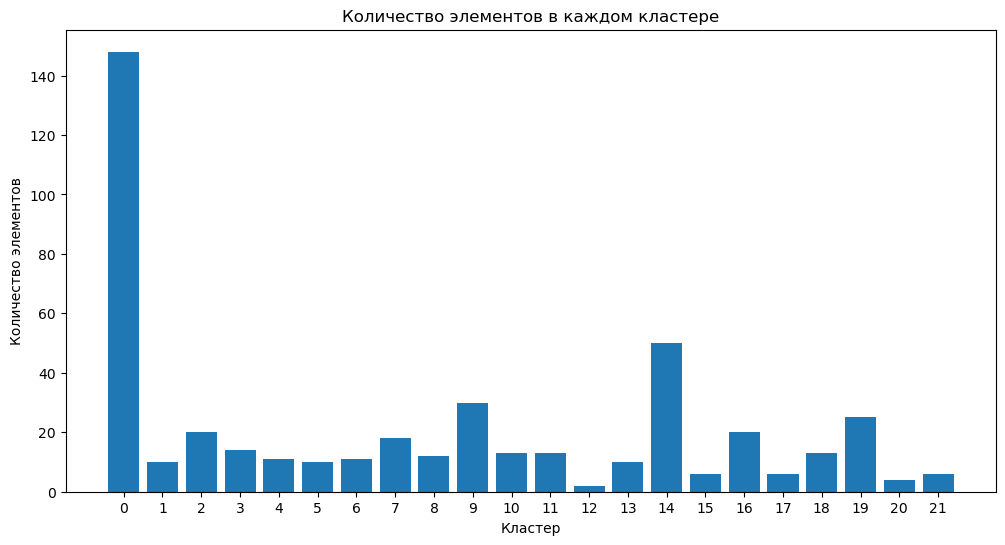

In [10]:
kmeans = KMeans(n_clusters=k, random_state=12345).fit(corpus_vec)

labels = kmeans.labels_
cluster_counts = [len(labels[labels == i]) for i in range(k)]

plt.figure(figsize=(12, 6))
plt.bar(range(k), cluster_counts, tick_label=[f'{i}' for i in range(k)])
plt.xlabel('–ö–ª–∞—Å—Ç–µ—Ä')
plt.ylabel('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤')
plt.title('–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ —ç–ª–µ–º–µ–Ω—Ç–æ–≤ –≤ –∫–∞–∂–¥–æ–º –∫–ª–∞—Å—Ç–µ—Ä–µ')
plt.show()

In [11]:
# –ü–æ–ª—É—á–∞–µ–º —Ü–µ–Ω—Ç—Ä–æ–∏–¥—ã –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
centroids = kmeans.cluster_centers_

# –ü–æ–ª—É—á–∞–µ–º –∏–Ω–¥–µ–∫—Å—ã –Ω–∞–∏–±–æ–ª–µ–µ –±–ª–∏–∑–∫–∏—Ö –∫ —Ü–µ–Ω—Ç—Ä–æ–∏–¥—É —Å–ª–æ–≤
top_words_indices = centroids.argsort()[:, ::-1][:, :10]  # –ó–¥–µ—Å—å 10 - –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã—Ö —Å–ª–æ–≤

# –ü–æ–ª—É—á–∞–µ–º —Å–ø–∏—Å–æ–∫ –≤—Å–µ—Ö —Å–ª–æ–≤
all_words = tf_idf.get_feature_names_out()

# –î–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞ –≤—ã–≤–æ–¥–∏–º –Ω–∞–∏–±–æ–ª–µ–µ —á–∞—Å—Ç—ã–µ —Å–ª–æ–≤–∞
for i, cluster_indices in enumerate(top_words_indices):
    top_words = [all_words[idx] for idx in cluster_indices]
    print(f"–ö–ª–∞—Å—Ç–µ—Ä {i}: {', '.join(top_words)}")

–ö–ª–∞—Å—Ç–µ—Ä 0: —Ñ–æ—Ä–º–∞–ª–∏–∑–º, –∞–≤–æ—Å—å, –ø–ª–∞–Ω, –æ—Ç–Ω–æ—à–µ–Ω–∏–µ, –æ–±—É—á–µ–Ω–∏–µ, –Ω–∞—Ä—É—à–µ–Ω–∏–µ, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫, –∏–Ω—Å—Ç—Ä—É–∫—Ü–∏—è, —Å–Ω–∏–∂–µ–Ω–∏–µ, –ø—Ä–∞–≤–∏–ª–æ
–ö–ª–∞—Å—Ç–µ—Ä 1: —Ç—Ä–µ–±–æ–≤–∞–Ω–∏–µ, –Ω–µ—Å–æ–±–ª—é–¥–µ–Ω–∏–µ, –ø—Ä–∞–≤–∏–ª–æ, –±–µ–∑–æ–ø–∞—Å–Ω–æ, –∏—Å–ø–æ–ª–Ω–µ–Ω–∏–µ, —Å–æ–±–ª—é–¥–µ–Ω–∏–µ, –Ω–∞—Ä—É—à–µ–Ω–∏–µ, –ª–Ω–∞, –±–µ–∑–æ–ø–∞, —Ç–µ—Ö–Ω–∏–∫–∞
–ö–ª–∞—Å—Ç–µ—Ä 2: —Ö–∞–ª–∞—Ç–Ω–æ—Å—Ç—å, —Ä–∞–±–æ—Ç–Ω–∏–∫, –ª–∏—á–Ω—ã–π, —ç—Ç–æ, –æ—Ç–Ω–æ—à–µ–Ω–∏–µ, –∏–Ω—Ñ–æ—Ä–º–∏—Ä–æ–≤–∞–Ω–Ω–æ—Å—Ç—å, –ª–∏–Ω—Ä—É–∫, –∫—É–ª—å—Ç—É—Ä–∞, –∫—É—á–∞, –ª–µ–≥–∫–æ–º—ã—Å–ª–µ–Ω–Ω—ã–π
–ö–ª–∞—Å—Ç–µ—Ä 3: —Ñ–æ—Ä–º–∞–ª—å–Ω—ã–π, –ø–æ–¥—Ö–æ–¥, –æ—Ç–Ω–æ—à–µ–Ω–∏–µ, –æ–±—É—á–µ–Ω–∏–µ, –∏–∑–º–µ–Ω—è—Ç—å—Å—è, –∏–Ω—Å—Ç—Ä—É–∫—Ç–∞–∂, –±–µ–∑–æ–ø–∞—Å, —Ä–∞–±–æ—Ç–∞, –∫–±, –º–∞—Å—Ç–µ—Ä
–ö–ª–∞—Å—Ç–µ—Ä 4: –¥–∏—Å—Ü–∏–ø–ª–∏–Ω–∞, —Ç—Ä—É–¥–æ–≤–æ–π, –Ω–∏–∑–∫–∏–π, —Ä–∞–±–æ—á–∏–π, –∏—Å–ø–æ–ª–Ω–∏—Ç–µ–ª—å—Å–∫–∏–π, —Ç—Ä—É–¥, –ø—Ä–æ–∏–∑–≤, —Å–ª–∞–±—ã–π, –ª–µ–Ω—å, –Ω–∞—Ä—É—à–µ–Ω–∏–µ
–ö–ª–∞—Å—Ç–µ—Ä 5: —Å—Ä–

–ö–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ–ª—É—á–∏–ª–æ—Å—å —Å–ª–∏—à–∫–æ–º –±–æ–ª—å—à–∏–º, –∏—Ö —Å–æ—Å—Ç–∞–≤ –±–ª–∏–∑–æ–∫ –∫ —Ö–æ—Ä–æ—à–µ–º—É —Ä–µ–∑—É–ª—å—Ç–∞—Ç—É, –Ω—É–∂–Ω–æ –ø–æ–ø—Ä–æ–±–æ–≤–∞—Ç—å –¥—Ä—É–≥–∏–µ –≤–∞—Ä–∏–∞–Ω—Ç—ã –º–æ–¥–µ–ª–µ–π.

## DBSCAN

In [12]:
hdb = DBSCAN(eps=0.8, n_jobs=-1).fit(corpus_vec)
hdb.labels_

array([-1,  0,  1, -1, -1, -1, -1,  2,  2, -1,  3, -1, -1, -1, -1, -1, -1,
        4,  0, -1,  2, -1, -1, -1, -1,  5, -1,  6, -1, -1, -1,  1,  4,  7,
       -1,  3,  7, -1,  3, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        8, -1,  5, -1,  2, -1, -1,  2,  2, -1,  7,  0, -1,  2, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  9, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  7, -1,  9, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1,  3, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  3,  9, -1, -1, -1, -1, -1, -1,
       -1, -1, -1,  3, -1, -1, -1, -1,  6,  1, -1, -1, -1, -1,  7, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, 10, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, 11, -1,  6,  9, -1, -1,  4, -1, -1,  9, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1,  5, -1, -1, -1, -1, -1, -1, -1,  9, -1, -1,
        1, -1, -1,  2, -1

DBSCAN –ø–æ–º–µ—á–∞–µ—Ç –ø–æ—á—Ç–∏ –≤—Å–µ –∫–∞–∫ —à—É–º, —á—Ç–æ –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç –¥–ª—è –Ω–∞—à–µ–π –∑–∞–¥–∞—á–∏

## Agglomerative Clustering

–ü–æ–ø—Ä–æ–±—É–µ–º —Å–¥–µ–ª–∞—Ç—å –º–µ–Ω—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, —á—Ç–æ–±—ã –±—ã–ª–æ —É–¥–æ–±–Ω–µ–µ –∏—Ö –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å

In [13]:
agg_clustering = AgglomerativeClustering(n_clusters=8)
clusters = agg_clustering.fit_predict(corpus_vec.toarray())

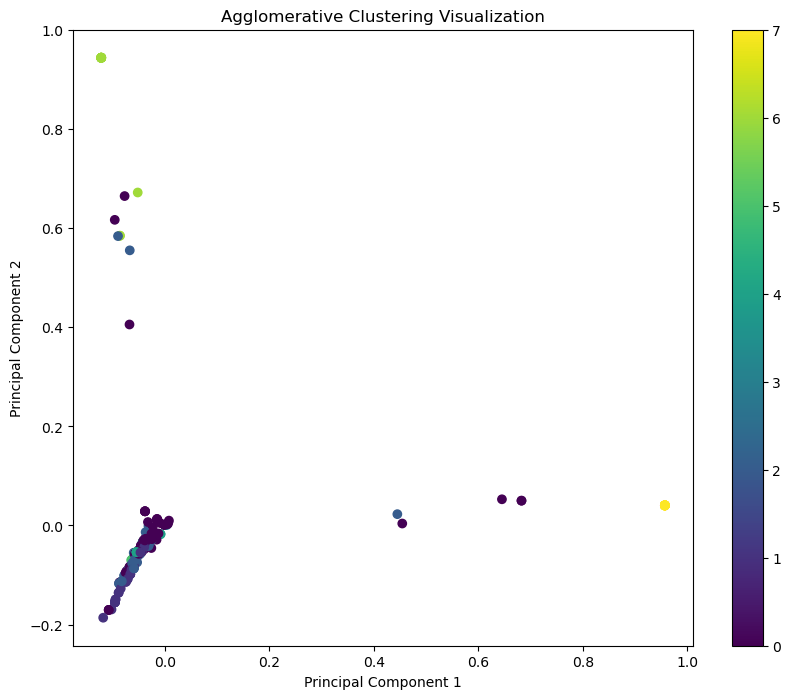

In [14]:
# –ü–æ–Ω–∏–∂–∞–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ 2-—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å PCA
pca = PCA(n_components=2)
transformed_features = pca.fit_transform(corpus_vec.toarray())
# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
plt.scatter(transformed_features[:, 0], transformed_features[:, 1], c=clusters, cmap='viridis')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [15]:
# —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏—è —Ç–æ–ø 3 —Å–ª–æ–≤ –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ
def top_tfidf_words(cluster_label, tfidf_matrix, feature_names, clusters, top_n=3):
    cluster_indices = np.where(clusters == cluster_label)[0]
    cluster_tfidf_scores = tfidf_matrix[cluster_indices].sum(axis=0).A1
    top_indices = np.argsort(cluster_tfidf_scores)[::-1][:top_n]
    top_words = [feature_names[i] for i in top_indices]
    return top_words

In [16]:
feature_names = tf_idf.get_feature_names_out()
for cluster_label in np.unique(clusters):
    top_words = top_tfidf_words(cluster_label, corpus_vec, feature_names, clusters)
    print(f'Cluster {cluster_label}: {top_words}')

Cluster 0: ['–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ', '–ª–∏—á–Ω—ã–π', '—Ä–∞–±–æ—Ç–∞']
Cluster 1: ['–∫–æ–Ω—Ç—Ä–æ–ª—å', '–Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–π', '—Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å']
Cluster 2: ['–Ω–∏–∑–∫–∏–π', '–¥–∏—Å—Ü–∏–ø–ª–∏–Ω–∞', '–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å']
Cluster 3: ['—Å–∞–º–æ—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å', '–±–µ–∑—Ä–∞–∑–ª–∏—á–∏–µ', '–¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å']
Cluster 4: ['–Ω–µ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å', '—Ä–∞–±–æ—Ç–Ω–∏–∫', '–Ω–µ–æ—Å–≤–µ–¥–æ–º–ª–µ–Ω']
Cluster 5: ['—Ñ–æ—Ä–º–∞–ª—å–Ω—ã–π', '–ø–æ–¥—Ö–æ–¥', '–æ–±—É—á–µ–Ω–∏–µ']
Cluster 6: ['–±–µ–∑–æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å', '—Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª', '—Ä–∞–±–æ—Ç–Ω–∏–∫']
Cluster 7: ['—Ö–∞–ª–∞—Ç–Ω–æ—Å—Ç—å', '—ç—Ç–æ', '–∫–æ—Ä–µ–Ω–Ω–æ–π']


In [17]:
print("–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ %.3f" % silhouette_score(corpus_vec.toarray(), agg_clustering.labels_))
print(f'Davies Bouldin Score: {davies_bouldin_score(corpus_vec.toarray(), agg_clustering.labels_)}')

–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ 0.109
Davies Bouldin Score: 2.624119540787798


–ú–µ—Ç—Ä–∏–∫–∞ —á—É—Ç—å –±–æ–ª—å—à–µ –Ω—É–ª—è, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ –ø–µ—Ä–µ–∫—Ä—ã—Ç–∏—è—Ö –≤ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏, –æ–¥–Ω–∞–∫–æ –∞–¥–µ–∫–≤–∞—Ç–Ω–æ—Å—Ç—å –µ–µ –æ—Ü–µ–Ω–∫–∏ –ø–æ–¥ –≤–æ–ø—Ä–æ—Å–æ–º –≤ —Å–≤—è–∑–∏ —Å–æ —Å–ø–µ—Ü–∏—Ñ–∏–∫–æ–π –∑–∞–¥–∞—á–∏

In [18]:
# –°–æ–∑–¥–∞–Ω–∏–µ DataFrame
data = []

for cluster_label in np.unique(clusters):
    cluster_indices = np.where(clusters == cluster_label)[0]
    cluster_sentences = text_series.iloc[cluster_indices].tolist()
    top_words = top_tfidf_words(cluster_label, corpus_vec, feature_names, clusters)
    
    data.append({
        '–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞': cluster_label,
        '–ü–æ–ª–Ω—ã–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è': cluster_sentences,
        '–¢–æ–ø 3 –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å–ª–æ–≤–∞': top_words
    })

df = pd.DataFrame(data)

In [19]:
df.head()

–ù–æ–º–µ—Ä –∫–ª–∞—Å—Ç–µ—Ä–∞                                 –ü–æ–ª–Ω—ã–µ –ø—Ä–µ–¥–ª–æ–∂–µ–Ω–∏—è  \
0               0  [–Ω–∞—Ä—É—à–µ–Ω–∏–µ  —Ç–±, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ –æ–±—É—á–µ–Ω–∏—è, –Ω–µ–ø–æ–Ω–∏–º–∞–Ω...   
1               1  [—Å–ª–∞–±—ã–π –∫–æ–Ω—Ç—Ä–æ–ª—å –ª–∏–Ω. —Ä—É–∫–æ–≤–æ–¥—Å—Ç, —Å–Ω–∏–∂–µ–Ω–Ω—ã–π –∫–æ–Ω...   
2               2  [–Ω–∏–∑–∫–∞—è –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å, –æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ –∫–≤–∞–ª–∏—Ñ–∏–∫–∞—Ü...   
3               3  [—Å–∞–º–æ—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å, —Å–∞–º–æ—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å, —Å–∞–º–æ—É–≤–µ—Ä–µ–Ω–Ω...   
4               4  [–Ω–µ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, –Ω–µ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ä–∞–±–æ—Ç–Ω–∏–∫–∞,...   

                  –¢–æ–ø 3 –ª–µ–º–º–∞—Ç–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö —Å–ª–æ–≤–∞  
0                  [–æ—Ç—Å—É—Ç—Å—Ç–≤–∏–µ, –ª–∏—á–Ω—ã–π, —Ä–∞–±–æ—Ç–∞]  
1       [–∫–æ–Ω—Ç—Ä–æ–ª—å, –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ—á–Ω—ã–π, —Ä—É–∫–æ–≤–æ–¥–∏—Ç–µ–ª—å]  
2         [–Ω–∏–∑–∫–∏–π, –¥–∏—Å—Ü–∏–ø–ª–∏–Ω–∞, –æ—Ç–≤–µ—Ç—Å—Ç–≤–µ–Ω–Ω–æ—Å—Ç—å]  
3  [—Å–∞–º–æ—É–≤–µ—Ä–µ–Ω–Ω–æ—Å—Ç—å, –±–µ–∑—Ä–∞–∑–ª–∏—á–∏–µ, –¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å]  
4    [–Ω–µ–≤–Ω–∏–º–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å, —Ä–∞–±–æ—Ç–Ω–∏–∫, –Ω–µ–æ—Å–≤–µ–¥–æ–º–ª–µ–Ω]

–ë—ã–ª–∞ –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –º–æ–¥–µ–ª—å –¥–ª—è –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ - agg_clustering. –í –Ω–µ–π –º–æ–∂–Ω–æ —É—Å—Ç–∞–Ω–æ–≤–∏—Ç—å –æ–≥—Ä–∞–Ω–∏—á–µ–Ω–∏–µ –ø–æ –∫–æ–ª–∏—á–µ—Å—Ç–≤—É –∫–ª–∞—Å—Ç–µ—Ä–æ–≤, —á—Ç–æ–±—ã –∏—Ö –±—ã–ª–æ —É–¥–æ–±–Ω–æ –≤–∏–∑—É–∞–ª–∏–∑–∏—Ä–æ–≤–∞—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—é. –°—É–¥—è –ø–æ –≥—Ä–∞—Ñ–∏–∫—É –∏ —Å–æ—Å—Ç–∞–≤—É —Ç–æ–ø —Å–ª–æ–≤ –≤ –∫–ª–∞—Å—Ç–µ—Ä–µ –º–æ–¥–µ–ª—å –∏–º–µ–µ—Ç –ø—Ä–∏–µ–º–ª–µ–º–æ–µ –∫–∞—á–µ—Å—Ç–≤–æ –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ, –¥–∞–ª–µ–µ –±—É–¥–µ–º –ø—Ä–æ–±–æ–≤–∞—Ç—å —É–ª—É—á—à–∏—Ç—å –ø–æ–∫–∞–∑–∞—Ç–µ–ª–∏ –¥—Ä—É–≥–∏–º–∏ –º–µ—Ç–æ–¥–∞–º–∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞.

# –¢–µ—Å—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –º–æ–¥–µ–ª–∏ –∏ –ø—Ä–æ–≤–µ—Ä–∫–∞ –¥—Ä—É–≥–∏—Ö —Å–ø–æ—Å–æ–±–æ–≤ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ –∏ —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤

–ü—Ä–æ–≤–µ—Ä–∏–º –º–æ–¥–µ–ª—å –Ω–∞ –æ–ø—Ä–æ—Å–∞—Ö —Å –º–∞–ª–µ–Ω—å–∫–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–≤–µ—Ç–æ–≤

In [20]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ JSON —Ñ–∞–π–ª–∞
with open("D:\datasets/all/27499.json", 'r') as f:
    data_2 = json.load(f)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–∞–∂–¥—ã–π —ç–ª–µ–º–µ–Ω—Ç –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑
text_list_2 = [item['answer'] for item in data_2['answers']]
text_series_2 = pd.Series(text_list_2, name='text')
text_series_2.head()

0                       worldskills
1    –∞–π—Ä–æ–Ω—Å—Ç–∞—Ä226—Ä–æ–∞—Ç–æ–º—Ç—Ä–∏–∞—Ç–ª–æ–Ω–∫–ª–∞–±
2                        –∞–∫—Ç–∏–≤–Ω–æ—Å—Ç–∏
3              –∞–º–±–∞—Å—Å–∞–¥–æ—Ä—ã –º–æ—â—â—â—â—â—å
4                      –∞–º–±–∞—Å—Å–∞–¥–æ—Ä—ãüíñ
Name: text, dtype: object

In [21]:
text_series_2.count()

339

In [22]:
corpus_2 = text_series_2.apply(clean).apply(lemmatize_spacy)

In [23]:
tf_idf_2 = TfidfVectorizer(stop_words=all_stopwords)
corpus_vec_2 = tf_idf_2.fit_transform(corpus_2) 

In [24]:
agg_clustering_2 = AgglomerativeClustering(n_clusters=8)
clusters_2 = agg_clustering_2.fit_predict(corpus_vec_2.toarray())

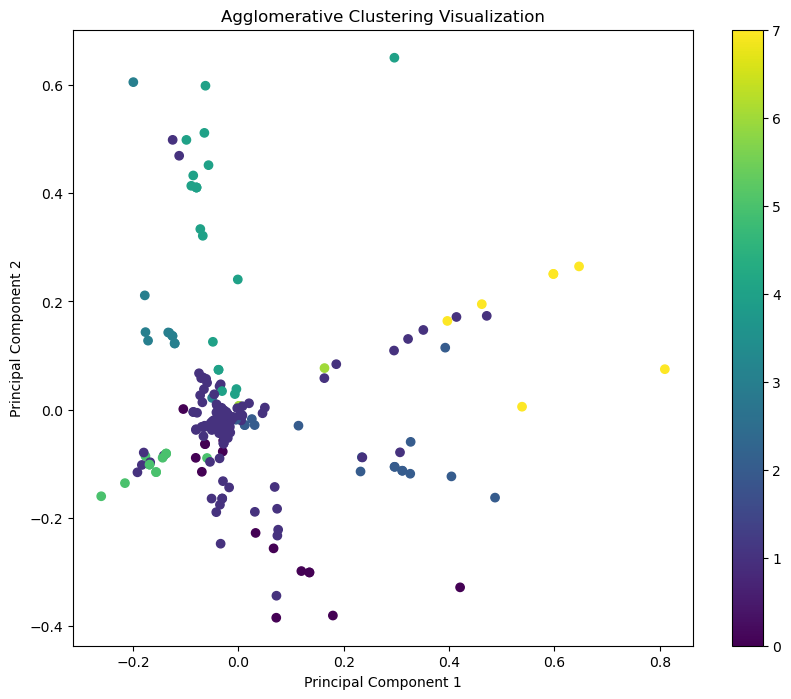

In [25]:
# –ü–æ–Ω–∏–∂–∞–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ 2-—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å PCA
pca_2 = PCA(n_components=2)
transformed_features_2 = pca_2.fit_transform(corpus_vec_2.toarray())

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
plt.scatter(transformed_features_2[:, 0], transformed_features_2[:, 1], c=clusters_2, cmap='viridis')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [26]:
feature_names_2 = tf_idf_2.get_feature_names_out()
for cluster_label in np.unique(clusters_2):
    top_words_2 = top_tfidf_words(cluster_label, corpus_vec_2, feature_names_2, clusters_2)
    print(f'Cluster {cluster_label}: {top_words_2}')

Cluster 0: ['–∫–∞—Ä—å–µ—Ä–∞', '—Ä–µ–∑—É–ª—å—Ç–∞—Ç', '–¥–æ—Å—Ç–∏–∂–µ–Ω–∏–µ']
Cluster 1: ['–±—É–¥—É—â–µ–µ', '—Å—Ç–∞—Ç—å', '–∂–∏–∑–Ω—å']
Cluster 2: ['—Ä–∞–∑–≤–∏—Ç–∏–µ', '—Ä–æ—Å—Å–∏—è', '—Ä–æ—Å—Ç']
Cluster 3: ['–ø—Ä–æ–µ–∫—Ç', '—Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è', '–Ω–∞–≤–∏–≥–∞—Ç–æ—Ä']
Cluster 4: ['–Ω–æ–≤—ã–π', '–∑–Ω–∞–∫–æ–º—Å—Ç–≤–æ', '–ø—É—Ç–µ—à–µ—Å—Ç–≤–∏–µ']
Cluster 5: ['—Ä–∞–±–æ—Ç–∞', '–∫–∞—Ä—å–µ—Ä', '—É—á–µ–±–∞']
Cluster 6: ['–¥–µ–Ω—å–≥–∞', '–≤–¥–æ—Ö–Ω–æ–≤–ª—è—Ç—å', '–∏–Ω—Ç–µ—Ä–µ—Å–Ω—ã–π']
Cluster 7: ['—á–µ–ª–æ–≤–µ–∫', '–≤–¥–æ—Ö–Ω–æ–≤–ª—è—Ç—å', '–ø–æ–Ω–∏–º–∞—Ç—å']


In [27]:
print("–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ %.3f" % silhouette_score(corpus_vec_2.toarray(), agg_clustering_2.labels_))
print(f'Davies Bouldin Score: {davies_bouldin_score(corpus_vec_2.toarray(), agg_clustering_2.labels_)}')

–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ 0.031
Davies Bouldin Score: 3.212881437121676


–ü—Ä–∏ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –≥–∏–ø–µ—Ä–ø–∞—Ä–∞–º–µ—Ç—Ä–∞ linkage –∫–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç—Å—è –Ω–∞ –º–∞–ª–µ–Ω—å–∫–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö —Å linkage='single', –∞ –Ω–∞ –±–æ–ª—å—à–∏—Ö —Å–æ —Å—Ç–∞–Ω–¥–∞—Ä—Ç–Ω—ã–º —Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ–º 'ward'. –ü—Ä–æ–≤–µ—Ä–∏–º —Å–∏–ª—É—ç—Ç –∏ davies_bouldin_score –≤ –∫–ª–∞—Å—Ç–µ—Ä–∞—Ö.

In [28]:
# –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö –∏–∑ JSON —Ñ–∞–π–ª–∞
with open("D:\datasets/all/20963.json", 'r') as f:
    data_3 = json.load(f)

# –°–æ–∑–¥–∞–µ–º —Å–ø–∏—Å–æ–∫, –≤ –∫–æ—Ç–æ—Ä–æ–º –∫–∞–∂–¥—ã–π —ç–ª–µ–º–µ–Ω—Ç –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤—É—é—â–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ —Ä–∞–∑
text_list_3 = [item['answer'] for item in data_3['answers']]
text_series_3 = pd.Series(text_list_3, name='text')
text_series_3.head()

0                        –≤–µ—Ä—Ç–∏–∫–∞–ª—å
1                       –≤–∑–∞–∏–º–Ω–æ—Å—Ç—å
2    –≤–∑–∞–∏–º–æ–≤—ã–≥–æ–¥–Ω–æ–µ —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–æ
3                      –ø–∞—Ä—Ç–Ω—ë—Ä—Å—Ç–≤–æ
4                   —Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–æ
Name: text, dtype: object

In [29]:
text_series_3.count()

23

–í —ç—Ç–æ–º –¥–∞—Ç–∞—Å–µ—Ç–µ –≤—Å–µ–≥–æ 23 –ø—Ä–∏–º–µ—Ä–∞

In [30]:
corpus_3 = text_series_3.apply(clean).apply(lemmatize_spacy)

In [31]:
tf_idf_3 = TfidfVectorizer(stop_words=all_stopwords)
corpus_vec_3 = tf_idf_3.fit_transform(corpus_3) 

In [32]:
agg_clustering_3 = AgglomerativeClustering(n_clusters=4)
clusters_3 = agg_clustering_3.fit_predict(corpus_vec_3.toarray())

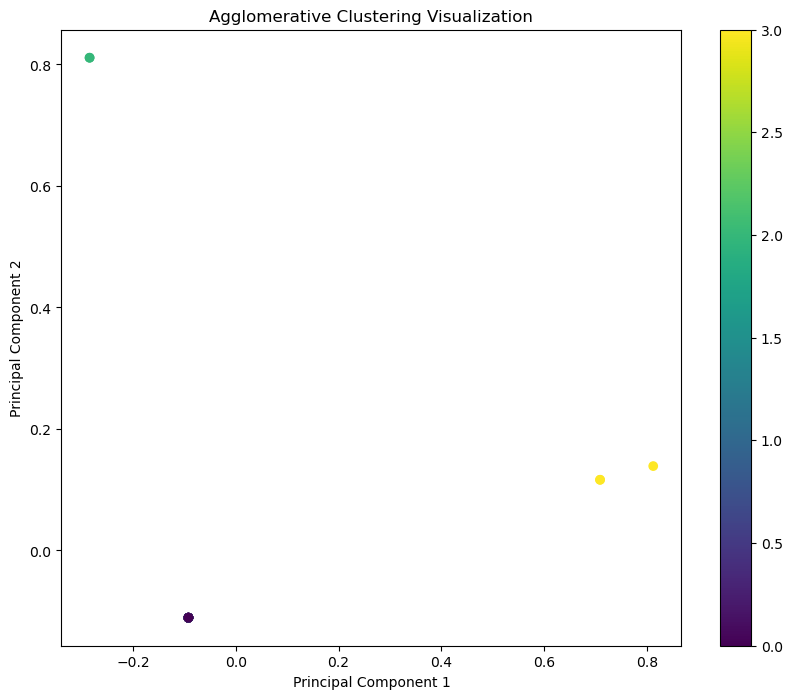

In [33]:
# –ü–æ–Ω–∏–∂–∞–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ 2-—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å PCA
pca_3 = PCA(n_components=2)
transformed_features_3 = pca_3.fit_transform(corpus_vec_3.toarray())

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
plt.scatter(transformed_features_3[:, 0], transformed_features_3[:, 1], c=clusters_3, cmap='viridis')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [34]:
feature_names_3 = tf_idf_3.get_feature_names_out()
for cluster_label in np.unique(clusters_3):
    top_words_3 = top_tfidf_words(cluster_label, corpus_vec_3, feature_names_3, clusters_3)
    print(f'Cluster {cluster_label}: {top_words_3}')

Cluster 0: ['–æ–±—â–µ–Ω–∏–µ', '–ø–æ–Ω–∏–º–∞–Ω–∏–µ', '–≤–∑–∞–∏–º–Ω–æ—Å—Ç—å']
Cluster 1: ['–ø—Ä–æ—Å—Ç–æ—Ç–∞', '—Å–æ–≤–º–µ—Å—Ç–Ω—ã–π', '–¥–µ—è—Ç–µ–ª—å–Ω–æ—Å—Ç—å']
Cluster 2: ['—Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–æ', '–≤–∑–∞–∏–º–æ–≤—ã–≥–æ–¥–Ω—ã–π', '—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π']
Cluster 3: ['–∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏—è', '—ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω—ã–π', '–¥–∏—Å—Ç–∞–Ω—Ü–∏–æ–Ω–Ω—ã–π']


In [35]:
print("–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ %.3f" % silhouette_score(corpus_vec_3.toarray(), agg_clustering_3.labels_))
print(f'Davies Bouldin Score: {davies_bouldin_score(corpus_vec_3.toarray(), agg_clustering_3.labels_)}')

–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ 0.080
Davies Bouldin Score: 2.2045675150801074


–ü–æ—Å–º–æ—Ç—Ä–µ–≤ –Ω–∞ –¥–∞–Ω–Ω—ã–µ —Å –º–∞–ª–µ–Ω—å–∫–∏–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º —Å—Ç—Ä–æ–∫ –≤—Å—Ç–∞–ª –≤–æ–ø—Ä–æ—Å –æ –Ω–∞—Å—Ç—Ä–æ–π–∫–µ –æ–ø—Ç–∏–º–∞–ª—å–Ω–æ–≥–æ —Ä–∞—Å—Å—Ç–æ—è–Ω–∏—è –≤ –∫–ª–∞—Å—Ç–µ—Ä–∞—Ö –∏ –∏—Ö –∫–æ–ª–∏—á–µ—Å—Ç–≤–µ. –ê–ª–≥–æ—Ä–∏—Ç–º —Å 8 –∫–ª–∞—Å—Ç–µ—Ä–∞–º–∏ —Ö–æ—Ä–æ—à–æ –ø–æ–∫–∞–∑—ã–≤–∞–µ—Ç —Å–µ–±—è –Ω–∞ –¥–∞—Ç–∞—Å–µ—Ç–∞—Ö c –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Ç–≤–µ—Ç–æ–≤ –æ—Ç 150. –ü–æ—Å–ª–µ –∞–≤—Ç–æ–º–∞—Ç–∏–∑–∞—Ü–∏–∏ —ç—Ç–æ–≥–æ –≤–æ–ø—Ä–æ—Å–∞ –ø–æ—Å–º–æ—Ç—Ä–∏–º, –º–æ–∂–Ω–æ –ª–∏ —Å–¥–µ–ª–∞—Ç—å —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏—é –ª—É—á—à–µ.

–ù–∞–ø–∏—à–µ–º —Ñ—É–Ω–∫—Ü–∏—é –¥–ª—è –≤—ã–±–æ—Ä–∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–µ—Ä–µ–¥ –æ–±—É—á–µ–Ω–∏–µ–º –º–æ–¥–µ–ª–∏. –ú–∞–∫—Å–∏–º–∞–ª—å–Ω—ã–º –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ–º –æ—Å—Ç–∞–≤–∏–º 8 –¥–ª—è —É–¥–æ–±—Å—Ç–≤–∞ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏, –¥–ª—è –º–∞–ª–µ–Ω—å–∫–∏—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤ —Å–¥–µ–ª–∞–µ–º –º–µ–Ω—å—à–µ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ. –ü–æ –∏—Ç–æ–≥–∞–º –ø—Ä–æ–≤–µ—Ä–∫–∏ –º–æ–¥–µ–ª–∏ –Ω–∞ —Ä–∞–∑–Ω—ã—Ö —Ñ–∞–π–ª–∞—Ö –±—ã–ª–æ —Ä–µ—à–µ–Ω–æ –≤—ã–¥–µ–ª–∏—Ç—å —Å–ª–µ–¥—É—é—â–µ–µ –∫–æ–ª-–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –≤ –∑–∞–≤–∏—Å–∏–º–æ—Å—Ç–∏ –æ—Ç –∫–æ–ª-–≤–∞ –æ—Ç–≤–µ—Ç–æ–≤:
1. 50 –∏ –º–µ–Ω–µ–µ –æ—Ç–≤–µ—Ç–æ–≤ - 3 –∫–ª–∞—Å—Ç–µ—Ä–∞
2. –æ—Ç 50 –¥–æ 200 - 4 –∫–ª–∞—Å—Ç–µ—Ä–∞
3. –æ—Ç 200 –¥–æ 350 - 6 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤
4. –æ—Ç 350 - 8 –∫–ª–∞—Å—Ç–µ—Ä–æ–≤

In [36]:
if text_series.count() <= 50:
     n = 3
elif text_series.count() <= 200:
     n = 4
elif text_series.count() <= 350:
     n = 5
else:
     n = 6
agg_clustering_prod = AgglomerativeClustering(n_clusters=n)

# –û–ø—Ç–∏–º–∏–∑–∞—Ü–∏—è —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞

–ú—ã –¥–æ–±–∏–ª–∏—Å—å –±—ã—Å—Ç—Ä–æ–π –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞, —á—Ç–æ —è–≤–ª—è–µ—Ç—Å—è –≤–∞–∂–Ω—ã–º –¥–ª—è —Å–ø–µ—Ü–∏—Ñ–∏–∫–∞ —Ä–∞–∑—Ä–∞–±–∞—Ç—ã–≤–∞–µ–º–æ–≥–æ —Å–µ—Ä–≤–∏—Å–∞, –æ–¥–Ω–∞–∫–æ –∫–∞—á–µ—Å—Ç–≤–æ –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –Ω–µ —Ç–∞–∫–æ–µ, –∫–∞–∫ —É –±–æ–ª—å—à–∏—Ö –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—ã—Ö –º–æ–¥–µ–ª–µ–π. –ü–æ–ø—Ä–æ–±—É–µ–º –∏—Å–ø–æ–ª—å–∑–æ–≤–∞—Ç—å –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω—É—é –º–æ–¥–µ–ª—å LaBSE-en-ru –¥–ª—è –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π —Ç–æ–∫–µ–Ω–∏–∑–∞—Ü–∏–∏ –∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞.

In [37]:
# –ò–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä—É–µ–º —Ç–æ–∫–µ–Ω–∏–∑–∞—Ç–æ—Ä –∏ –º–æ–¥–µ–ª—å
tokenizer = AutoTokenizer.from_pretrained("cointegrated/LaBSE-en-ru")
model = AutoModel.from_pretrained("cointegrated/LaBSE-en-ru")

embeddings_list = []

for text in text_series_3:
    encoded_input = tokenizer(text, padding=True, truncation=True, max_length=64, return_tensors='pt')
    with torch.no_grad():
        model_output = model(**encoded_input)
    embedding = model_output.pooler_output
    embeddings_list.append(embedding[0].numpy())

embeddings = np.asarray(embeddings_list)

Some weights of the model checkpoint at cointegrated/LaBSE-en-ru were not used when initializing BertModel: ['cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.weight', 'cls.predictions.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.bias', 'cls.seq_relationship.bias', 'cls.seq_relationship.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [38]:
agg_clustering_labse = AgglomerativeClustering(n_clusters=4)
clusters_labse= agg_clustering_labse.fit_predict(embeddings)

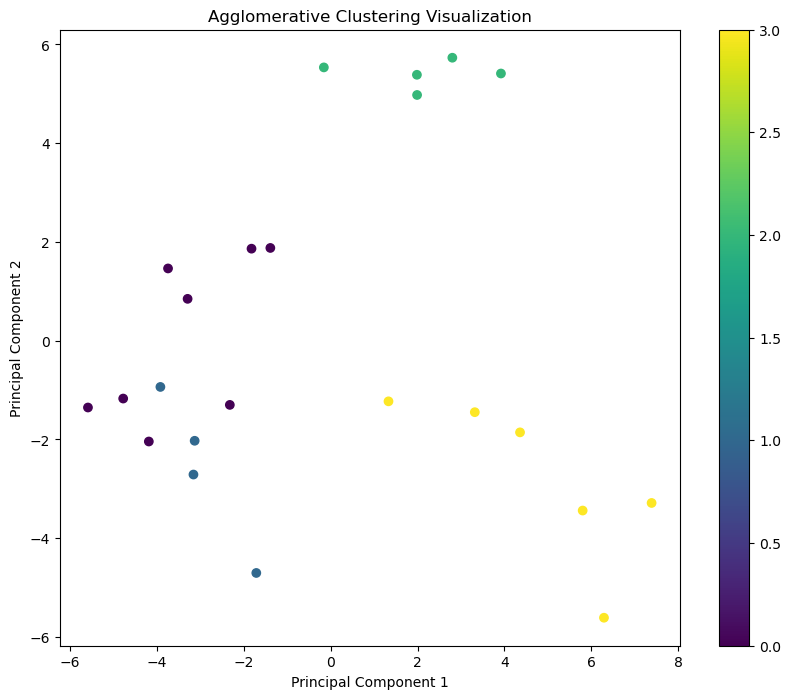

In [39]:
# –ü–æ–Ω–∏–∂–∞–µ–º —Ä–∞–∑–º–µ—Ä–Ω–æ—Å—Ç—å –¥–æ 2-—Ö –∫–æ–º–ø–æ–Ω–µ–Ω—Ç —Å PCA
pca_labse = PCA(n_components=2)
transformed_features_labse = pca_labse.fit_transform(embeddings)

# –í–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏—è
plt.figure(figsize=(10, 8))
plt.scatter(transformed_features_labse[:, 0], transformed_features_labse[:, 1], c=clusters_labse, cmap='viridis')
plt.title('Agglomerative Clustering Visualization')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar()
plt.show()

In [40]:
# 1. –í–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏—è —Ç–µ–∫—Å—Ç–æ–≤
tfidf_vectorizer = TfidfVectorizer(max_features=1000)  # –£–∫–∞–∑—ã–≤–∞–µ—Ç–µ –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ–µ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –ø—Ä–∏–∑–Ω–∞–∫–æ–≤
tfidf_matrix = tfidf_vectorizer.fit_transform(text_series_3)

# 2. –ò–Ω–≤–µ—Ä—Ç–∏—Ä–æ–≤–∞–Ω–∏–µ –∏–Ω–¥–µ–∫—Å–æ–≤
feature_names = tfidf_vectorizer.get_feature_names_out()

# 3. –ê–Ω–∞–ª–∏–∑ –≤–µ—Å–æ–≤
cluster_top_words = {}

for cluster_label in np.unique(clusters_labse):
    cluster_indices = np.where(clusters_labse == cluster_label)[0]
    cluster_tfidf_scores = tfidf_matrix[cluster_indices].sum(axis=0).A1

    # 4. –ü–æ–ª—É—á–µ–Ω–∏–µ —Ç–æ–ø —Å–ª–æ–≤
    top_indices = np.argsort(cluster_tfidf_scores)[::-1][:3]  # —Ç–æ–ø 3 —Å–ª–æ–≤–∞
    top_words = [feature_names[i] for i in top_indices]

    cluster_top_words[cluster_label] = top_words

# –í—ã–≤–µ–¥–µ–º —Ç–æ–ø —Å–ª–æ–≤ –¥–ª—è –∫–∞–∂–¥–æ–≥–æ –∫–ª–∞—Å—Ç–µ—Ä–∞
for cluster_label, top_words in cluster_top_words.items():
    print(f'Cluster {cluster_label}: {top_words}')


Cluster 0: ['—É–¥–æ–±—Å—Ç–≤–æ', '–≤–∑–∞–∏–º–Ω–æ—Å—Ç—å', '–ø—Ä–æ—Å—Ç–æ—Ç–∞']
Cluster 1: ['–≤–µ—Ä—Ç–∏–∫–∞–ª—å', '—Ä–∞—Å—Å—Ç–æ—è–Ω–∏–µ', '–ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å']
Cluster 2: ['—Å–æ—Ç—Ä—É–¥–Ω–∏—á–µ—Å—Ç–≤–æ', '–∫–æ–æ–ø–µ—Ä–∞—Ü–∏—è', '–ø–∞—Ä—Ç–Ω—ë—Ä—Å—Ç–≤–æ']
Cluster 3: ['–∫–æ–º–º—É–Ω–∏–∫–∞—Ü–∏—è', '–æ–±—â–µ–Ω–∏–µ', '–∫–æ–º–∞—É–Ω–∏–∫–∞—Ü–∏—è']


–°–ª–æ–≤–∞ –¥–ª—è –ª–µ–π–±–ª–∏–Ω–≥–∞ –ø–æ–ª—É—á–∏–ª–∏—Å—å –ª—É—á—à–µ —Å–≥—Ä—É–ø–ø–∏—Ä–æ–≤–∞–Ω—ã, —á–µ–º –≤ –º–æ–¥–µ–ª–∏ —Å –±–æ–ª–µ–µ –ø—Ä–æ—Å—Ç–æ–π –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–æ–π –∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–µ–π. –ü–æ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –≤–∏–¥–Ω–æ, —á—Ç–æ –≤ —Ü–µ–ª–æ–º —Ä–∞–∑–º–µ—Ç–∫–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –ø–æ–ª—É—á–∏–ª–∞—Å—å –±–æ–ª–µ–µ –∫–∞—á–µ—Å—Ç–≤–µ–Ω–Ω–æ–π. –û–¥–Ω–∞–∫–æ —ç—Ç–æ—Ç —Å–ø–æ—Å–æ–± –Ω–∞–º –Ω–µ –ø–æ–¥—Ö–æ–¥–∏—Ç, —Ç–∞–∫ –∫–∞–∫ –Ω–∞ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É –≤–æ–ø—Ä–æ—Å–∞ —Å 23 –æ—Ç–≤–µ—Ç–∞–º–∏ —É—à–ª–æ –±–æ–ª–µ–µ 14 —Å–µ–∫—É–Ω–¥, —á—Ç–æ –º–æ–∂–µ—Ç –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ —Å–∫–∞–∑–∞—Ç—å—Å—è –Ω–∞ —Å–∫–æ—Ä–æ—Å—Ç–∏ –∑–∞–≥—Ä—É–∑–∫–∏ –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è. –ü—Ä–∏ –¥–∞–ª—å–Ω–µ–π—à–µ–π –∞–¥–∞–ø—Ç–∞—Ü–∏–∏ –º–æ–∂–Ω–æ –¥–æ–±–∏—Ç—å—Å—è —É—Å–∫–æ—Ä–µ–Ω–∏—è.

In [41]:
print(f"–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ {silhouette_score(embeddings, agg_clustering_labse.labels_)}")
print(f'Davies Bouldin Score: {davies_bouldin_score(embeddings, agg_clustering_labse.labels_)}')

–ö–∞—á–µ—Å—Ç–≤–æ –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –ø–æ –º–µ—Ç—Ä–∏–∫–µ —Å–∏–ª—É—ç—Ç—Ç–∞ 0.1360253095626831
Davies Bouldin Score: 1.8835664286721732


–ú–µ—Ç—Ä–∏–∫–∏ –≤—ã—Ä–æ—Å–ª–∏ –Ω–µ –Ω–∞ –º–Ω–æ–≥–æ, –æ–¥–Ω–∞–∫–æ –∫–∞—á–µ—Å—Ç–≤–æ –ª–µ–π–±–ª–∏–Ω–≥–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –∏ –∏—Ö –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∏–µ –Ω–∞ –≤–∏–∑—É–∞–ª—å–Ω—ã—Ö –ø—Ä–∏–º–µ—Ä–∞—Ö –≤—ã—Ä–æ—Å–ª–∞ –∑–Ω–∞—á–∏—Ç–µ–ª—å–Ω–æ, —á—Ç–æ –≥–æ–≤–æ—Ä–∏—Ç –æ —Ç–æ–º, —á—Ç–æ –¥–ª—è –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ –º–µ—Ç—Ä–∏–∫–∞ –Ω–µ –¥–∞–µ—Ç –Ω–∏—á–µ–≥–æ –¥–ª—è –æ—Ü–µ–Ω–∫–∏ –º–æ–¥–µ–ª–∏.

# –í—ã–≤–æ–¥—ã

–í —Ä–∞–º–∫–∞—Ö –ø–æ–¥–≥–æ—Ç–æ–≤–∫–∏ –º–æ–¥–µ–ª–∏ –¥–ª—è —Å–µ—Ä–≤–∏—Å–∞ –±—ã–ª–∞ –ø—Ä–æ–≤–µ–¥–µ–Ω–∞ —Å–ª–µ–¥—É—é—â–∞—è —Ä–∞–±–æ—Ç–∞:
1.	–ü—Ä–æ–≤–µ–ª –æ–±—â–∏–π –æ–±–∑–æ—Ä –¥–∞–Ω–Ω—ã—Ö, –æ–ø—Ä–µ–¥–µ–ª–µ–Ω–∞ –∑–∞–¥–∞—á–∞ –¥–ª—è –æ–±—É—á–µ–Ω–∏—è –º–æ–¥–µ–ª–∏;
2.	–í—ã–±—Ä–∞–ª –æ—Å–Ω–æ–≤–Ω–æ–π –º–µ—Ç–æ–¥ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ –∏ –≤–µ–∫—Ç–æ—Ä–∏–∑–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–∞ —Å –ø–æ–º–æ—â—å—é spacy –∏ Tf-Idf;
3.	–ü—Ä–æ–≤–µ—Ä–∏–ª —Ä–∞–±–æ—Ç–æ—Å–ø–æ—Å–æ–±–Ω–æ—Å—Ç—å –º–æ–¥–µ–ª–µ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ K-Means, DBSCAN –∏ Agglomerative Clustering, –∑–∞ –æ—Å–Ω–æ–≤—É –≤—ã–±—Ä–∞–Ω–∞ –ø–æ—Å–ª–µ–¥–Ω—è—è;
4.	–ú–æ–¥–µ–ª—å –ø—Ä–æ—Ç–µ—Å—Ç–∏—Ä–æ–≤–∞–ª –Ω–∞ —Ä–∞–∑–Ω—ã—Ö –≤–∞—Ä–∏–∞–Ω—Ç–∞—Ö –¥–∞—Ç–∞—Å–µ—Ç–æ–≤, —á—Ç–æ –ø–æ–¥—Ç–≤–µ—Ä–¥–∏–ª–æ –µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ—Å—Ç—å –¥–ª—è –ª–µ–π–±–ª–∏–Ω–≥–∞ –∫–ª–∞—Å—Ç–µ—Ä–æ–≤ –Ω–∞ –¥–∞–ª—å–Ω–µ–π—à–µ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–∏ –¥–ª—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—è
5.	–ü—Ä–æ–≤–µ—Ä–∏–ª –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫—É —Ç–µ–∫—Å—Ç–∞ —Å –ø–æ–º–æ—â—å—é LaBSE –Ω–∞ –≤—ã–±—Ä–∞–Ω–Ω–æ–π –º–æ–¥–µ–ª–∏, –æ–±–æ—Å–Ω–æ–≤–∞–ª, –ø–æ—á–µ–º—É –Ω–µ –ø–æ–ª—É—á–∏—Ç—Å—è –ø—Ä–∏–º–µ–Ω–∏—Ç—å –≤ —Ç–µ–∫—É—â–µ–π –∏—Ç–µ—Ä–∞—Ü–∏–∏ —Å–µ—Ä–≤–∏—Å–∞.

–û—Å–Ω–æ–≤–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –∑–∞–∫–∞–∑—á–∏–∫–∞ –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ —Ä–µ—à–µ–Ω–∞ ‚Äì –º–æ–¥–µ–ª—å –ø—Ä–µ–¥–æ—Å—Ç–∞–≤–ª—è–µ—Ç –≤–æ–∑–º–æ–∂–Ω–æ—Å—Ç—å —Å–æ–∑–¥–∞–Ω–∏—è –æ–Ω–ª–∞–π–Ω-–æ–ø—Ä–æ—Å–Ω–∏–∫–∞ —Å –∞–≤—Ç–æ–º–∞—Ç–∏—á–µ—Å–∫–æ–π –≤–∏–∑—É–∞–ª–∏–∑–∞—Ü–∏–µ–π –∫–ª–∞—Å—Ç–µ—Ä–∏–∑–∞—Ü–∏–∏ –æ—Ç–≤–µ—Ç–æ–≤ –≤ —Ä–µ–∞–ª—å–Ω–æ–º –≤—Ä–µ–º–µ–Ω–∏. –° –ø–æ–º–æ—â—å—é —Ç–æ–ø 3 —Å–ª–æ–≤ –∫–ª–∞—Å—Ç–µ—Ä–∞ –ø–æ–ª—É—á–∏–ª–æ—Å—å –æ–±–æ–∑–Ω–∞—á–∏—Ç—å —Å–µ–º–∞–Ω—Ç–∏—á–µ—Å–∫–∏–π —Å–º—ã—Å–ª —Ä–∞–∑–¥–µ–ª–µ–Ω–∏—è –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏—Ö –æ—Ç–≤–µ—Ç–æ–≤ –Ω–∞ –≥—Ä—É–ø–ø—ã, –∞ —Ç–∞–∫–∂–µ —É–¥–∞–ª–æ—Å—å –¥–æ–±–∏—Ç—å—Å—è –≤—ã—Å–æ–∫–æ–π —Å–∫–æ—Ä–æ—Å—Ç–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –∏ –æ–±—É—á–µ–Ω–∏—è, —á—Ç–æ –ø–æ–∑–≤–æ–ª–∏—Ç —É–ª—É—á—à–∏—Ç—å –∫–ª–∏–µ–Ω—Ç—Å–∫–∏–π –æ–ø—ã—Ç —Å —Ç–æ—á–∫–∏ –∑—Ä–µ–Ω–∏—è –æ–∂–∏–¥–∞–Ω–∏—è —Ä–µ–∑—É–ª—å—Ç–∞—Ç–æ–≤ –∏ –∏—Ö –∫–∞—á–µ—Å—Ç–≤–∞. <br> –û—Å–Ω–æ–≤–Ω–∞—è –ø—Ä–æ–±–ª–µ–º–∞ –¥–∞–Ω–Ω–æ–π –∑–∞–¥–∞—á–∏ —Å–æ—Å—Ç–æ—è–ª–∞ –≤ —Ç–æ–º, —á—Ç–æ –∞–ª–≥–æ—Ä–∏—Ç–º –¥–æ–ª–∂–µ–Ω –±—ã—Ç—å –º–∞–∫—Å–∏–º–∞–ª—å–Ω–æ —É–Ω–∏–≤–µ—Ä—Å–∞–ª—å–Ω—ã–º, —Ç–∞–∫ –∫–∞–∫ –æ–ø—Ä–æ—Å—ã –Ω–∞ —Å–∞–π—Ç–µ –º–æ–≥—É—Ç –±—ã—Ç—å –∞–±—Å–æ–ª—é—Ç–Ω–æ –ª—é–±–æ–π –Ω–∞–ø—Ä–∞–≤–ª–µ–Ω–Ω–æ—Å—Ç–∏, –∞ –∫–æ–ª–∏—á–µ—Å—Ç–≤–æ –æ—Ç–≤–µ—Ç–æ–≤ –æ—á–µ–Ω—å —Å–∏–ª—å–Ω–æ —Ä–∞–∑–Ω–∏—Ç—Å—è –æ—Ç —Å–ª—É—á–∞—è –∫ —Å–ª—É—á–∞—é. –¢–µ–∫—É—â–∞—è –≤–µ—Ä—Å–∏—è –º–æ–¥–µ–ª–∏ –ø–æ–∑–≤–æ–ª—è–µ—Ç —Å —Ö–æ—Ä–æ—à–µ–π —Ç–æ—á–Ω–æ—Å—Ç—å—é —Ä–∞–∑–¥–µ–ª–∏—Ç—å –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–µ –æ—Ç–≤–µ—Ç—ã –Ω–∞ –≥—Ä—É–ø–ø—ã —Å –≤–∏–∑—É–∞–ª—å–Ω—ã–º –ø—Ä–µ–¥—Å—Ç–∞–≤–ª–µ–Ω–∏–µ–º –Ω–∞ —Å–∞–π—Ç–µ. <br>–í –¥–∞–ª—å–Ω–µ–π—à–µ–º –º–æ–∂–Ω–æ –µ—â–µ –ø–æ–≤—ã—Å–∏—Ç—å –∫–∞—á–µ—Å—Ç–≤–æ –º–æ–¥–µ–ª–∏, —á—Ç–æ –±—ã–ª–æ –ø–æ–∫–∞–∑–∞–Ω–æ –≤ –ø—É–Ω–∫—Ç–µ 5, –æ–¥–Ω–∞–∫–æ –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ —É –∫–æ–º–∞–Ω–¥—ã –Ω–µ —Ö–≤–∞—Ç–∞–µ—Ç —Ç–µ—Ö–Ω–∏—á–µ—Å–∫–∏—Ö –º–æ—â–Ω–æ—Å—Ç–µ–π –¥–ª—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –ø—Ä–µ–¥–æ–±—Ä–∞–±–æ—Ç–∫–∏ —Ç–µ–∫—Å—Ç–∞ –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–π –º–æ–¥–µ–ª—å—é, —Ç–∞–∫ –∫–∞–∫ —Å–∫–æ—Ä–æ—Å—Ç—å –æ–±—Ä–∞–±–æ—Ç–∫–∏ —Å–ª–∏—à–∫–æ–º –Ω–∏–∑–∫–∞—è, —á—Ç–æ –Ω–∞ –¥–∞–Ω–Ω–æ–º —ç—Ç–∞–ø–µ —Å–∏–ª—å–Ω–æ —É—Ö—É–¥—à–∏—Ç –ø–æ–ª—å–∑–æ–≤–∞—Ç–µ–ª—å—Å–∫–∏–π –æ–ø—ã—Ç.